In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import pandas as pd
import geopandas as gpd
from numpy  import array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
# It is time now for classification with Multilayer Perceptron
df = gpd.read_file("/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/Nepal/nepal_dev.shp")

df_mp = pd.DataFrame(df)
df_mp = df_mp[['povindex', 'malkids','nosafh20', 'ad_illit','depr_class']].values

print(df_mp)

[[27.33 42.9  11.12 34.46  1.  ]
 [31.16 54.7   8.32 38.65  1.  ]
 [28.54 47.5  12.56 34.84  1.  ]
 [24.62 26.2  17.47 32.43  0.  ]
 [19.43 26.9  18.25 21.87  0.  ]
 [33.38 26.3  15.39 46.74  0.  ]
 [22.45 32.   30.   15.96  1.  ]
 [27.34 21.7  20.58 37.23  0.  ]
 [19.18 16.2  30.48 20.32  0.  ]
 [35.66 37.1  12.32 49.41  0.  ]
 [42.24 45.   12.13 58.68  1.  ]
 [38.03 46.6  19.26 50.49  1.  ]
 [41.72 43.6  11.88 58.11  1.  ]
 [35.7  44.   22.15 46.4   1.  ]
 [44.75 43.6   9.58 62.96  1.  ]
 [36.35 44.4  20.39 47.9   1.  ]
 [43.86 37.7  11.01 62.    0.  ]
 [37.95 36.3  35.52 48.92  1.  ]
 [40.09 39.6   3.96 56.75  0.  ]
 [28.44 25.1  21.55 38.21  0.  ]
 [36.37 37.2   4.62 51.31  0.  ]
 [46.43 39.7   4.87 66.11  0.  ]
 [24.8  42.   15.77 27.77  1.  ]
 [33.03 45.5  31.43 36.91  2.  ]
 [27.57 44.9  18.27 31.41  1.  ]
 [25.32 31.5   3.08 35.09  0.  ]
 [33.64 47.4  32.41 36.84  2.  ]
 [26.52 29.4   3.58 37.12  0.  ]
 [33.01 63.4  22.29 30.64  2.  ]
 [26.96 46.1  22.   26.54  1.  ]
 [21.82 24

In [19]:
# Define, target, features, train and test datasets
Y = df_mp[:,-1]
X = df_mp[:,:-1]

# print(X)
# print(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, 
                                                random_state = 42)

print(X.shape, Y.shape)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)


(75, 4) (75,)
(52, 4) (23, 4)
(52,) (23,)


In [20]:
# Scale the data
scaler = StandardScaler()
scaler.fit(xtrain)
X_train = scaler.transform(xtrain)
X_test = scaler.transform(xtest)

print(X_train)
print(X_test)

[[ 1.5030147   1.87380571  0.92477386  1.15599082]
 [ 1.23675806  0.73105538  0.81187338  1.20177332]
 [-1.56415734 -1.72032839 -1.31850956 -1.07837464]
 [-0.84369821 -1.9507216  -0.08396737 -0.43652197]
 [ 0.14562792 -0.32875339  1.89097288 -0.40420491]
 [-0.56308459 -1.05679594 -1.26860428 -0.08552281]
 [-0.01882471  1.29321482  0.55171141 -0.80816813]
 [ 1.40382105  1.03517442  1.10885073  1.2287042 ]
 [ 0.9848584   0.2518375   2.16913348  0.50336579]
 [-0.70012845 -1.63738683 -0.00460979 -0.34854775]
 [ 0.88305439  1.03517442  1.68398867  0.21610306]
 [-1.10734448 -1.04758021 -1.51567634 -0.62862892]
 [-0.99901458 -0.47620505 -1.56312726 -0.58194872]
 [ 0.24743193  0.10438585  0.04447738  0.38666531]
 [ 2.01725545  2.10419892  0.69079171  1.85709143]
 [-1.19870705 -1.53601382 -0.33840251 -0.86741607]
 [ 0.54109734 -0.60522524  1.13830303  0.61288471]
 [-0.5304551  -1.18581614  0.03793242 -0.25069888]
 [-1.90872475 -2.45758667  0.72597084 -1.95452598]
 [-0.75886153 -0.3656163  -0.69

In [21]:
# Classify
clf = MLPClassifier(solver = 'lbfgs',
                    alpha = 1e-5,
                    hidden_layer_sizes = (5,2),
                    random_state = 1)

clf.fit(X_train, ytrain)

Pred_mp = clf.predict(X_test)
print(Pred_mp)
print(ytest)

[0. 2. 1. 1. 0. 2. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 2. 1. 2. 2. 0.]
[0. 1. 1. 1. 0. 2. 2. 1. 1. 0. 2. 0. 1. 0. 0. 1. 0. 1. 2. 1. 2. 2. 0.]


Classification accuracy of multilayer perceptron is 0.782608695652174


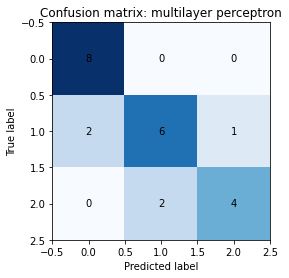

In [22]:
# Ready to calculate accuracy score and confusion matrix
pa_mp = accuracy_score(ytest, Pred_mp, normalize = False)
print("Classification accuracy of multilayer perceptron is", pa_mp/len(ytest))

cm = confusion_matrix(ytest, Pred_mp)

plt.imshow(cm,interpolation = 'none',
           cmap = 'Blues')

for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha = 'center', 
             va = 'center')
    
plt.title('Confusion matrix: multilayer perceptron')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()